## Домашнее задание 2. Методы одномерной оптимизации.
### Deadline - 27.09.2024

# Основная часть

__Определение__ Одномерная функция $f: [a,b] \to \mathbb{R}$ называется унимодальной на отрезке $[a,b]$, если существует $c^* \in [a,b]$ такое, что

1) для любых $a \leq x < y \leq c^*$ имеем $f(x) > f(y)$,

2) для любых $c^* \leq x < y \leq b$ имеем $f(x) < f(y)$.

В этом задании будем минимизировать такого рода функции.

__Задача 1. (всего 5 баллов)__ Рассмотрим метод дихотомии:

```python
def binpoisk(f, a, b, eps):
    '''
        f - целевая унимодальная на [a, b] функция
        a, b - концы отрезка
        eps - требуемая точность найденного решения,
            т.е. возвращаемое c должно быть таким, что abs(c - c*) <= eps
        
        Функция возвращает найденное с точностью eps точку минимума
    '''
    c = (a + b) / 2
    while (b - a) > eps:
        d = (a + c) / 2
        if f(d) <= f(c):
            b = c
            c = d
        else:
            e = (b + c) / 2
            if f(c) <= f(e):
                a = d
                b = e
            else:
                a = c
                c = e
    return c
```

__а). (1 балла)__ Докажите корректность для нахождения минимума унимодальной функции.

__Ваше решение__

Пусть $c^*$ - точка минимума унимодальной функции $f(x)$. Пусть $a_i, b_i, c_i$ - значения $a, b, c$ после итерации $i$. Докажу, что $\forall i \in \mathbb{N}: a_i, b_i, c_i \in [a_0, b_0] \wedge 0 < b_i - a_i = \frac{b_{i - 1} - a_{i - 1}}{2} \wedge c_i = \frac{a_i + b_i}{2} \wedge c^* \in [a_i, b_i]$.

#### **Докажем по индукции.**

**База**: $c_0 = \frac{a_o + b_0}{2}, a_0, b_0 \in [a_0, b_0] \wedge a_0 < b_0 \wedge c^* \in [a_0, b_0] = [a, b]$ в силу унимодальности $f(x)$.

**Шаг**: Пусть $ i \in \mathbb{N} \wedge \forall j \in \mathbb{N} \cup \{ 0 \}: j < i$ доказано. Докажем для итерации $i$. Разберем случаи:
1. $f \bigl( \frac{a_{i - 1} + c_{i - 1}}{2} \bigr) \le f(c_{i - 1})$

    1.1. $c_{i - 1} \in \bigl[ \frac{a_{i - 1} + c_{i - 1}}{2}, c^* \bigr]$. По унимодальности $x = \frac{a_{i - 1} + c_{i - 1}}{2}$, $y = c_{i - 1}: f \bigl( \frac{a_{i - 1} + c_{i - 1}}{2} \bigr) > f(c_{i - 1}) \large\bot$
    
    1.2. Иначе $c^* < c_{i - 1}$. $a_i = a_{i - 1} \in [a_0, b_0] \wedge b_i = c_{i - 1} = \frac{a_{i - 1} + b_{i - 1}}{2} \in [a_0, b_0] \wedge b_i - a_i = \frac{b_{i - 1} - a_{i - 1}}{2} > 0 \wedge c_i = \frac{a_{i - 1} + c_{i - 1}}{2} = \frac{a_{i - 1} + \frac{a_{i - 1} + b_{i - 1}}{2}}{2} = \frac{a_i + b_i}{2} \in [a_0, b_0] \wedge c^* \in [a_{i - 1}, b_{i - 1}] = [a_i, b_{i - 1}]$. 
   
     $\quad c^* < c_{i - 1} = b_i = \frac{a_{i - 1} + b_{i - 1}}{2} < b_{i - 1} \Rightarrow c^* \in [a_i, b_i]$
    
2. $f \bigl( \frac{a_{i - 1} + c_{i - 1}}{2} \bigr) > f(c_{i - 1}) \wedge f \bigl( \frac{b_{i - 1} + c_{i - 1}}{2} \bigr) \le f(c_{i - 1})$

    1.1. $c_{i - 1} \in \bigl[ c^*, \frac{b_{i - 1} + c_{i - 1}}{2} \bigr]$. По унимодальности $y = \frac{b_{i - 1} + c_{i - 1}}{2}$, $x = c_{i - 1}: f \bigl( \frac{b_{i - 1} + c_{i - 1}}{2} \bigr) > f(c_{i - 1}) \large\bot$
    
    1.2. Иначе $c^* > c_{i - 1}$. $b_i = b_{i - 1} \in [a_0, b_0] \wedge a_i = c_{i - 1} = \frac{a_{i - 1} + b_{i - 1}}{2} \in [a_0, b_0] \wedge b_i - a_i = \frac{b_{i - 1} - a_{i - 1}}{2} > 0 \wedge c_i = \frac{b_{i - 1} + c_{i - 1}}{2} = \frac{b_{i - 1} + \frac{a_{i - 1} + b_{i - 1}}{2}}{2} = \frac{a_i + b_i}{2} \in [a_0, b_0] \wedge c^* \in [a_{i - 1}, b_{i - 1}] = [a_{i - 1}, b_i]$. 
     
     $\quad c^* > c_{i - 1} = a_i = \frac{a_{i - 1} + b_{i - 1}}{2} > a_{i - 1} \Rightarrow c^* \in [a_i, b_i]$
   
3. Иначе: $f \bigl( \frac{a_{i - 1} + c_{i - 1}}{2} \bigr) > f(c_{i - 1}) \wedge f \bigl( \frac{b_{i - 1} + c_{i - 1}}{2} \bigr) > f(c_{i - 1})$. $\frac{a_{i - 1} + c_{i - 1}}{2} < c_{i - 1} < \frac{b_{i - 1} + c_{i - 1}}{2}$
    
    3.1. $c^* < \frac{a_{i - 1} + c_{i - 1}}{2}$. По унимодальности $x = \frac{a_{i - 1} + c_{i - 1}}{2}$, $y = c_{i - 1}: f \bigl( \frac{a_{i - 1} + c_{i - 1}}{2} \bigr) < f(c_{i - 1}) \large\bot$

    3.2. $c^* > \frac{b_{i - 1} + c_{i - 1}}{2}$. По унимодальности $y = \frac{b_{i - 1} + c_{i - 1}}{2}$, $x = c_{i - 1}: f \bigl( \frac{b_{i - 1} + c_{i - 1}}{2} \bigr) < f(c_{i - 1}) \large\bot$

Значит, при $i^* = \Bigl\lceil log_2 \bigl( \frac{b_0 - a_0}{\varepsilon} \bigr) \Bigr\rceil = \Bigl\lceil log_2 \bigl( \frac{b - a}{\varepsilon} \bigr) \Bigr\rceil$ мы получим, что $c^* \in [a_{i^*}, b_{i^*}] \wedge 0 < b_{i^*} - a_{i^*} \le \varepsilon$ и алгоритм завершит свою работу с $|c_{out} - c^*| = |c_{i^*} - c^*| \le b_{i^*} - a_{i*} = \frac{b - a}{2^{i^*}}$

__б). (1.5 баллов)__ Какова будет итерационная и оракульная сложность данного алгоритма для достижения точности $\varepsilon$ (а именно, $|c_{out} - c^*| \leq \varepsilon$)? Необходимо получить верхнюю оценку на число итераций и подсчета значений $f$ метода дихотомии для минимизации унимодальных функций.

__Ваше решение__

**Итерационная сложность**: $i^* = \Bigl\lceil log_2 \bigl( \frac{b - a}{\varepsilon} \bigr) \Bigr\rceil \Rightarrow \mathcal{O} \bigl( log_2 \bigl( \frac{b - a}{\varepsilon} \bigr) \bigr)$ 

**Оракульная сложность**: на каждой итерации происходит не более 4 запросов к оракулу. Следовательно, сложность равна $\mathcal{O} \bigl(4 \cdot log_2 \bigl( \frac{b - a}{\varepsilon} \bigr) \bigr) = \mathcal{O} \bigl( log_2 \bigl( \frac{b - a}{\varepsilon} \bigr) \bigr)$

__в). (0.5 балла)__ Придумайте свою унимодальную функцию (постарайтесь придумать не самый тривиальный пример, если совсем не получается обратите внимание на функцию $f(x) = \sin x \cdot e^x$ и модернизируйте ее). Покажите, что она является унимодальной на каком-то отрезке. Где у нее находится $c^*$?

__Ваше решение__

$f(x) = -\sin(x) \cdot e^{-x}$, $x \in [-1, 3]$

$f'(x) = \sqrt{2} e^{-x} \cdot \sin \bigl( x - \frac{\pi}{4} \bigl)$

$\sin \bigl( x - \frac{\pi}{4} \bigl) \ge 0 \Leftrightarrow x \in \bigl[ 2 \pi k + \frac{\pi}{4}, 2 \pi (k + 1) + \frac{\pi}{4} \bigr]$, $k \in \mathbb{Z}$

$\sin \bigl( x - \frac{\pi}{4} \bigl) \le 0 \Leftrightarrow x \in \bigl[ 2 \pi (k - 1) + \frac{\pi}{4}, 2 \pi k + \frac{\pi}{4} \bigr]$, $k \in \mathbb{Z}$

$-2 \pi + \frac{\pi}{4} < -1 < \frac{\pi}{4} < 3 < 2 \pi + \frac{\pi}{4} \Rightarrow \bigl( x \in [-1, \frac{\pi}{4}) \hookrightarrow f'(x) < 0 \bigr) \wedge \bigl( x \in (\frac{\pi}{4}, 3] \hookrightarrow f'(x) > 0 \bigr) \Rightarrow f(x)$ унимодальна с $c^* = \frac{\pi}{4}$.

__г). (2 балла)__ Реализуйте и запустите для этой функции метод дихотомии. Постройте 2 графика сходимости:

1) по оси абцисс - число итераций, по оси ординат - $|c_{out} - c^*|$,

2) по оси абцисс - число оракульных вызовов $f$, по оси ординат - $|c_{out} - c^*|$.

Нанесите на оба графика теоретическую оценку из пункта 1.б) основной части.

Следите за оформлением графиков: размер графика, масштаб осей (обычный или логарифмический), подписи осей (в том числе размер), легенда (так как на каждом графике будет две линии), толщина линий и т.д.. Графики должны быть удобны для чтения.

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(palette='Set2', rc={'figure.figsize': (16, 9)})


def Dichotomy(f, a, b, eps, criterion):
    c = (a + b) / 2
    iter_err = [criterion(c)]
    orac_err = [criterion(c)]

    while (b - a) > eps:
        d = (a + c) / 2
        orac_calls = 2
        if f(d) <= f(c):
            b = c
            c = d
        else:
            e = (b + c) / 2
            orac_calls += 2
            if f(c) <= f(e):
                a = d
                b = e
            else:
                a = c
                c = e

        iter_err.append(criterion(c))
        orac_err.extend((orac_err[-1],) * (orac_calls - 1))
        orac_err.append(criterion(c))

    return c, iter_err, orac_err


def MakePlot(errors_th: np.array, errors_ex: np.array, title: str) -> None:
    """
    Creates a plot with parameters
    
    :param errors_th: Theoretical error
    :param errors_ex: Actual error 
    :param title: plot title
    """
    fig, ax = plt.subplots()
    ax.set_xlabel("Iteration")
    ax.set_ylabel("Logarithm of Error Value")
    ax.set_yscale('log')
    ax.set_title(title)

    sns.lineplot(x=np.arange(len(errors_ex)), y=errors_ex, ax=ax, label="Actual")
    sns.lineplot(x=np.arange(len(errors_th)), y=errors_th, ax=ax, label="Theoretical")

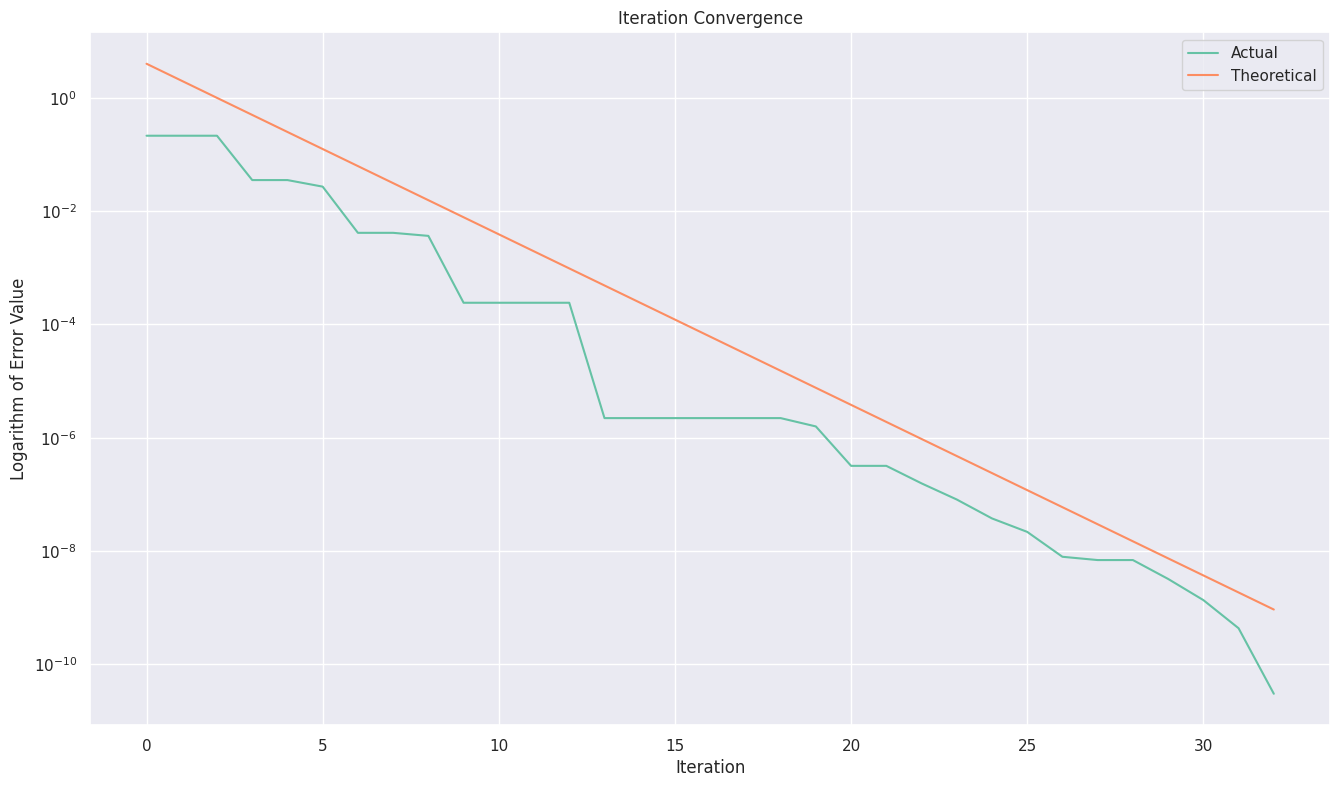

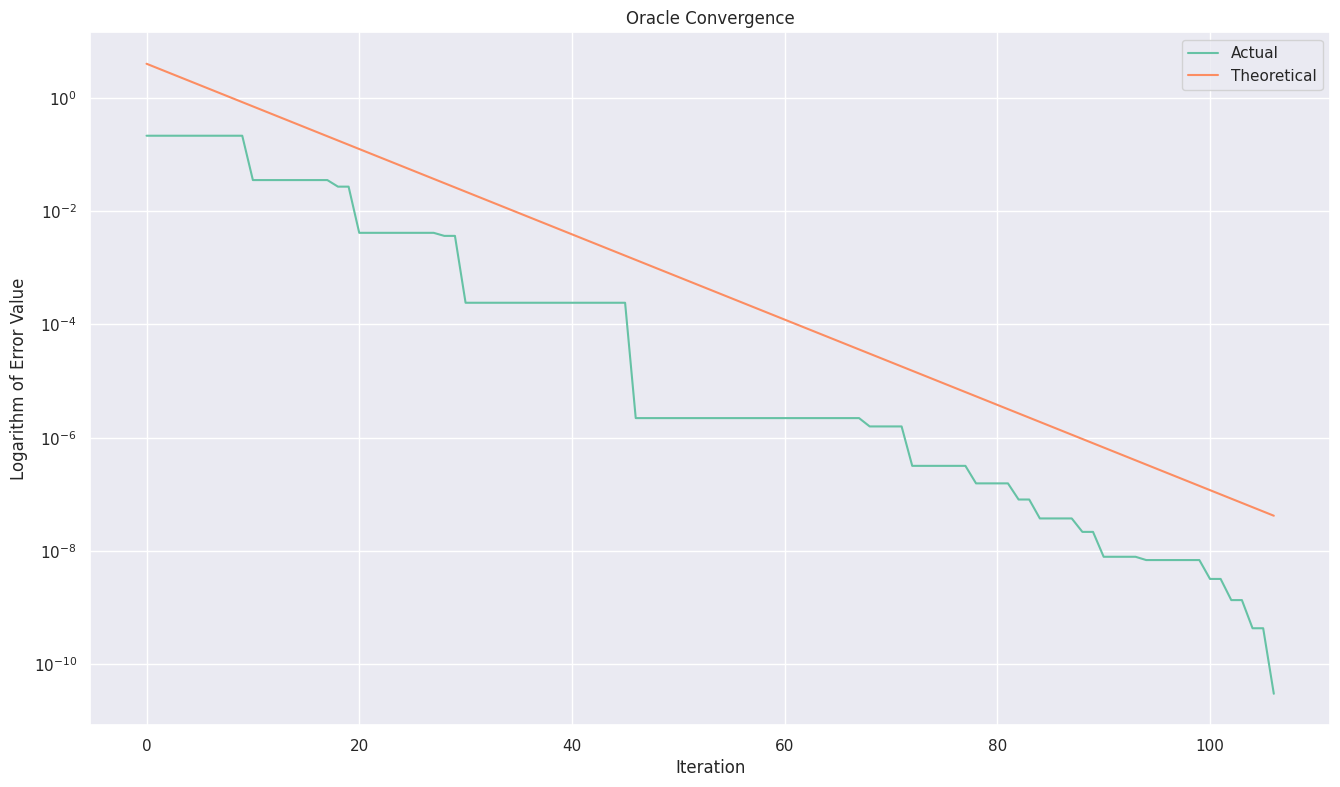

In [75]:
A = -1
B = 3
C_opt = np.pi / 4
EPS = 1e-9
F = lambda x: -np.sin(x) * np.exp(-x)
C = lambda x: np.abs(x - c_opt)

res, iterat_err, oracle_err = Dichotomy(F, A, B, EPS, C)
MakePlot(errors_th=(B - A) / np.power(2, np.arange(len(iterat_err))), errors_ex=iterat_err,
         title="Iteration Convergence")
MakePlot(errors_th=(B - A) / np.power(2, np.arange(len(oracle_err)) / 4), errors_ex=oracle_err,
         title="Oracle Convergence")

Теоретическая оценка сходимости является верхней, потому на самом деле мы получаем слегка лучший результат. Метод работает.

# Дополнительная часть

__Задача 2. (всего 5 баллов)__ Рассмотрим метод золотого сечения:

```python
def golden_ration(f, a, b, eps):
    '''
        f - целевая унимодальная на [a, b] функция
        a, b - концы отрезка
        eps - требуемая точность найденного решения,
            т.е. возвращаемое c = (a + b) / 2 должно быть таким, что abs(c - c*) <= eps
        
        Функция возвращает найденное с точностью eps точку минимума
    '''
    tau = (1 + sqrt(5)) / 2
    while (b - a) > eps:
        t = (b - a) / tau
        c = b - t
        d = a + t
        if f(d) <= f(c):
            a = c
        else:
            b = d
    return (a + b) / 2
```

__а). (1 балла)__ Докажите корректность и сходимость данного алгоритма для нахождения минимума унимодальной функции.

__Ваше решение__

__б). (1.5 баллов)__ Какова будет итерационная и оракульная сложность данного алгоритма для достижения точности $\varepsilon$ (а именно, $|c_{out} - c^*| \leq \varepsilon$)?

__Ваше решение__

Сравнивая полученные оценки сложности с полученными ранее, лучше или хуже данный алгоритм, чем метод дихотомии?

_Hint:_ возможно ли улучшения псевдокода метода золотого сечения с точки зрения оракульной сложности?

__Ваше решение__

__в). (1 балла)__ Реализуйте для той же унимодальной функции метод золотого сечения. Постройте графики сходимости, аналогичные предыдущему пункту.

In [2]:
#ваше решение

__г). (0.5 балла)__ Объедините результаты сходимости двух методов на одном графике.

In [3]:
#ваше решение

__д). (1 балла)__ Сделайте вывод об эффективности алгоритмов. Какой из них показал себя лучше/хуже на рассматриваемой функции? Какой из них на практике оказался ближе к теоретическим оценкам?

__Ваше решение__